## from avery

In [1]:
import numpy as np


def order_corner(node):
    corn = node.corners_original
    return [corn[0][1], corn[1][1], corn[0][0], corn[1][0]]

def filter_wcorners(node, corners):
    """
    Search node based on position 
    """
    filtered = {}
    for k in node:
        one_branch = node[k]
        branch_corner = one_branch.corners_original
        if (corners[1][0] < branch_corner[0][0]) or (corners[0][0] > branch_corner[1][0]) or (corners[1][1] < branch_corner[0][1]) or (corners[0][1] > branch_corner[1][1]):
            pass
        else:
            filtered[k] = one_branch
            
    return filtered

def filter_tree_wcorners(trees, ref_tree):
    """
    Search tree based on position
    """
    corners = ref_tree.root_node.corners_original
    filtered = {}
    for k in trees:
        one_tree = trees[k]
        one_corner = one_tree.root_node.corners_original
        if (corners[1][0] < one_corner[0][0]) or (corners[0][0] > one_corner[1][0]) or (corners[1][1] < one_corner[0][1]) or (corners[0][1] > one_corner[1][1]):
            pass
        else:
            filtered[k] = one_tree
    return filtered


def config_pixeloc(node):
    """
    Config "valid" pixel locations of a given node mask with corner info
    """
    yinx, xinx = np.where(node.mask[::-1,:]) # valid indices and flip to origin='lower'
    corners = node.corners_original
    #print (corners)
    xmin = corners[0][1]
    ymax = corners[1][0]
    #print (xmin, ymax)
    xloc = xinx + xmin
    yloc = ymax - yinx
    #pixloc = np.vstack((xloc, yloc))
    return xloc, yloc



def compute_overlap(test, ref):
    """
    Compute the test's overlapping fraction based on ref
    """
    xref, yref = config_pixeloc(ref)
    ref_coord = np.array(zip(xref, yref))
    ref_set = set(map(tuple,ref_coord))
    
    xtest, ytest = config_pixeloc(test)
    test_coord = np.array(zip(xtest, ytest))
    test_set = set(map(tuple,test_coord))
    
    overlap_set = test_set.intersection(ref_set)
    #print len(ref_set)
    overlap_frac = float(len(overlap_set)) / float(len(ref_set))
    return overlap_frac

def compute_matchability(ref_tree, new_tree):
    """
    Check overlapping fraction of found tree
    """
    oldv = ref_tree.getTreeVelocityRange()
    newv = new_tree.getTreeVelocityRange()
    overlpv = list(set(oldv).intersection(set(newv)))
    
    if len(oldv) > len(newv):
        matchability = np.zeros(len(oldv))
        pvs = oldv
        print ("old one is longer?")
    else:
        matchability = np.zeros(len(newv))
        pvs = newv
        
    for i in overlpv:
        new_ind = np.where(newv==i)[0][0]
        old_ind = np.where(oldv==i)[0][0]
        new_node = new_tree.getNode(new_ind)
        old_node = ref_tree.getNode(old_ind)
        overlap = compute_overlap(new_node, old_node)
        matchability[new_ind] = overlap
    return pvs, matchability

def possible_merge(trees, ovlp_thresh=0.85):
    """
    Go through trees and find other trees that are overlaped with velocity and position
    """
    merg_tree = {}
    for k in trees:
        one_tree = trees[k]
        onevs = set(one_tree.getTreeVelocityRange())
        xoverlap = filter_tree_wcorners(trees, one_tree)
        candidates = []
        for j in xoverlap:
            two_tree = xoverlap[j]
            ovlp_frac = compute_overlap(two_tree.root_node, one_tree.root_node)
            twovs = set(two_tree.getTreeVelocityRange())
            inter = onevs.intersection(twovs)
            if (len(inter) > 0) and (ovlp_frac > ovlp_thresh) and (k is not j):
                candidates.append(j)
            
        if len(candidates) > 0:
            merg_tree[k] = candidates
    
    return merg_tree


In [2]:
import pickle
import os

In [3]:
old_trees = pickle.load(open('../../pickled_dicts/fifth_batch/all_trees.p', 'rb'))

In [ ]:
trees = old_trees

In [ ]:
p_merge = possible_merge(trees)

In [ ]:
p_merge

{'719_1081_0': ['1960_1068_0'],
 '2493_986_0': ['9429_972_0'],
 '1467_1082_1': ['144516_1071_0'],
 '895_1063_0': ['38201_1052_0'],
 '408_1016_0': ['12893_1017_0'],
 '2430_1008_0': ['7583_992_0'],
 '1868_1074_0': ['758_1070_3'],
 '16004_1056_0': ['32378_1054_0'],
 '562_1049_6': ['2058_1040_1'],
 '572_1040_1': ['1781_1038_0'],
 '648_962_8': ['1208_955_1'],
 '363_962_13': ['32064_958_0'],
 '433_994_4': ['4472_982_0'],
 '2541_1038_0': ['6215_1037_0'],
 '1427_974_2': ['471_975_3'],
 '718_1048_2': ['1772_1045_0'],
 '926_995_0': ['26254_976_0'],
 '529_1081_1': ['36822_1051_0'],
 '406_1076_26': ['5011_1076_0'],
 '451_959_6': ['1803_955_0'],
 '445_992_15': ['1421_994_0'],
 '397_1049_6': ['14259_1044_0'],
 '680_1070_3': ['146735_1047_0', '2302_1067_0'],
 '434_1049_18': ['3389_1047_0'],
 '539_1007_5': ['888_1003_4'],
 '35692_968_0': ['138601_955_0'],
 '639_994_1': ['2107_992_0'],
 '5528_1073_0': ['516061_1052_0'],
 '552_1060_0': ['134317_1048_0'],
 '2488_977_0': ['8719_957_0'],
 '11716_1029_0': [

In [7]:
len(p_merge)

1045

In [11]:
a_tree = trees['1018_998_3']
b_tree = trees['3499_991_0']

In [12]:
a_tree.root_node.corners_original

[[1896, 15770], [1943, 15830]]

In [13]:
b_tree.root_node.corners_original

[[1882, 15763], [1984, 15917]]

In [14]:
a_tree.__dict__

{'has_ended': True,
 'length': 2,
 'node_list': [<cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11aca32d8>,
  <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11b525f80>],
 'root_node': <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11b5250e0>,
 'root_v_slice': 998}

In [15]:
b_tree.__dict__

{'has_ended': True,
 'length': 9,
 'node_list': [<cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11c39dd40>,
  <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11c39d050>,
  <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11b2c8998>,
  <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11b2c8c68>,
  <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11ae29098>,
  <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11ae29a28>,
  <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11ae29368>,
  <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11d539290>,
  <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11d539b90>],
 'root_node': <cube_fil_finder.structs.mask_obj_node.MaskObjNode instance at 0x11d539830>,
 'root_v_slice': 991}

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
a_tree.root_node.__dict__

{'corner_max': [1943, 15830],
 'corner_min': [1896, 15770],
 'corners': [[1896, 15770], [1943, 15830]],
 'corners_original': [[1896, 15770], [1943, 15830]],
 'mask': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]], dtype=bool),
 'mask_size': 2820,
 'masked_area_size': 1043,
 'v_slice_index': [998, 999],
 'visited': True}

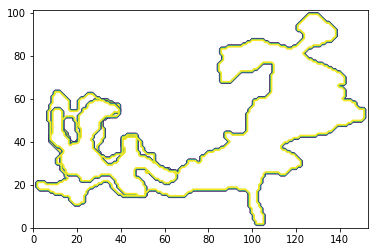

In [34]:
a_node = a_tree.root_node
b_node = b_tree.root_node
new_corners = a_node.matchCorners(b_node)
a_mask = a_node.expandMask(new_corners)
b_mask = b_node.expandMask(new_corners)
plt.contour(a_mask)
plt.contour(b_mask)
plt.show()

In [43]:
len(trees)

4538

In [44]:
len(p_merge)

54

In [12]:
pickle.dump(p_merge, ('../../debug/fifth_batch/merge_test/p_merge.pickle)

('489_991_7', ['7408_990_0'])


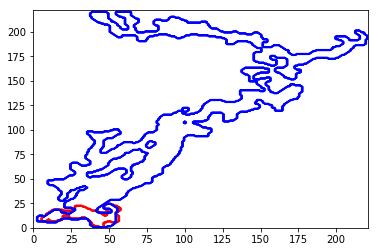

('1623_996_0', ['23329_990_0'])


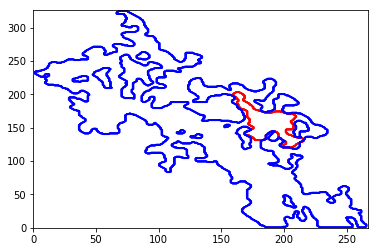

('748_990_7', ['716_991_5'])


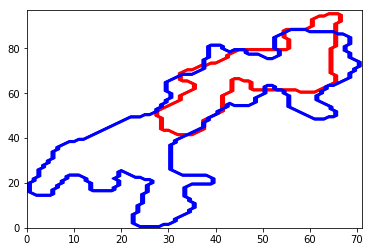

('596_992_1', ['7703_990_0'])


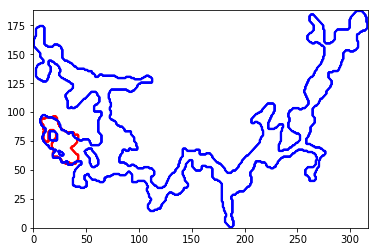

('408_995_20', ['572_993_11'])


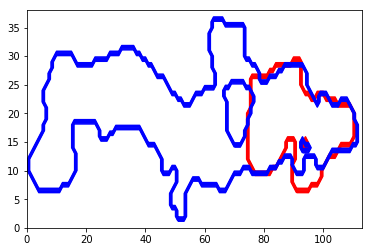

('668_999_0', ['16459_995_0'])


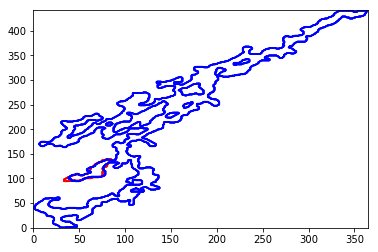

('1086_990_0', ['36370_990_0'])


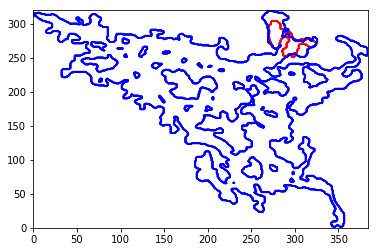

('1053_999_1', ['1970_990_0'])


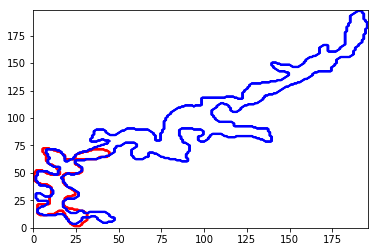

('461_992_13', ['19100_996_0'])


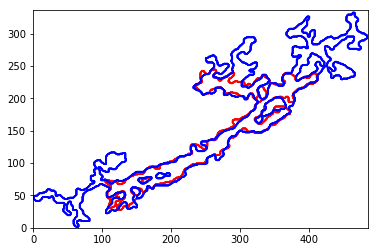

('830_999_2', ['2210_991_0'])


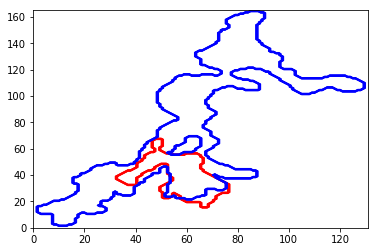

('416_990_17', ['450_991_4'])


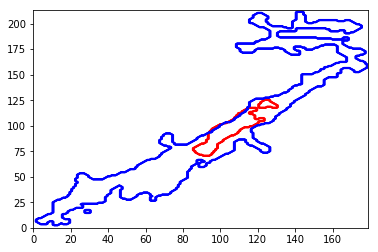

('1897_994_0', ['1564_995_0'])


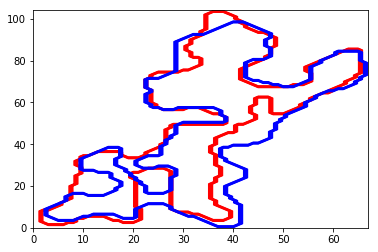

('657_996_3', ['1154_993_0'])


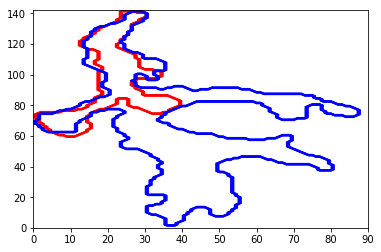

('782_992_0', ['3682_990_0'])


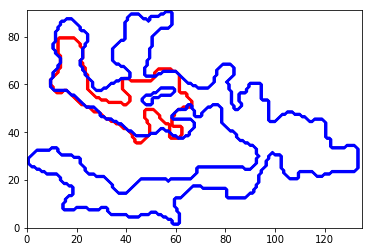

('3066_997_0', ['4813_990_0'])


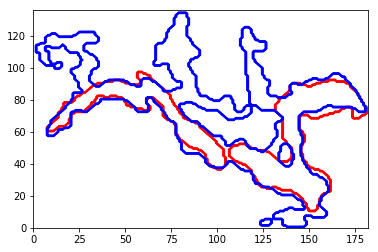

('806_996_0', ['5217_992_0'])


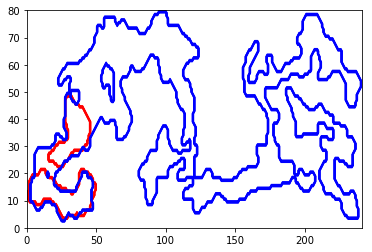

('630_994_1', ['694_991_0'])


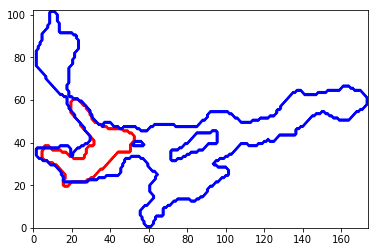

('1543_996_0', ['5454_990_0'])


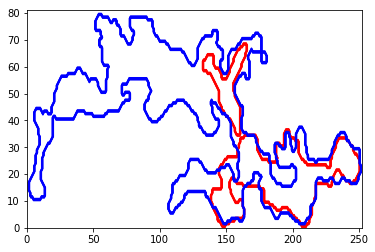

('3753_997_0', ['4221_996_0'])


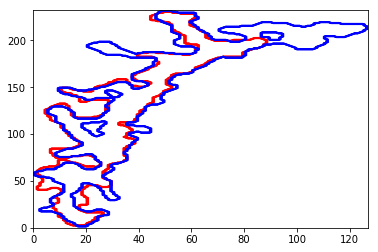

('2624_990_1', ['586_992_13'])


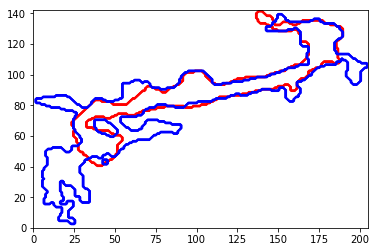

('523_997_19', ['5217_992_0'])


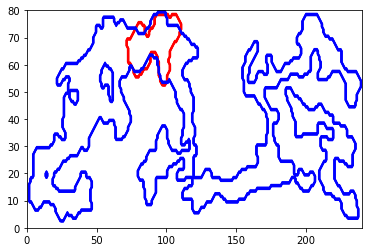

('830_997_5', ['747_994_0'])


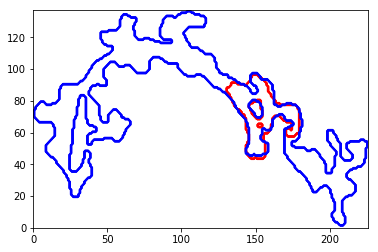

('1413_992_0', ['2119_991_0'])


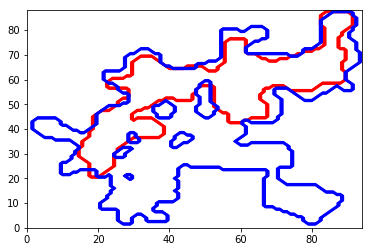

('661_993_6', ['2210_991_0'])


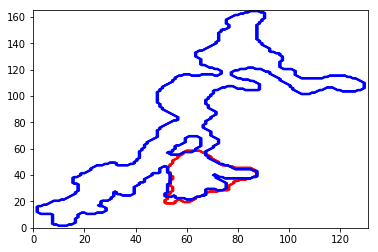

('490_990_0', ['4073_990_0'])


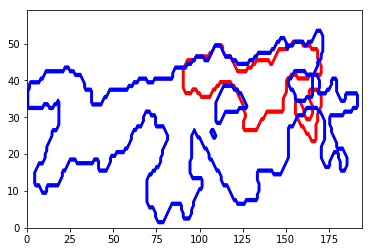

('445_992_15', ['1421_994_0'])


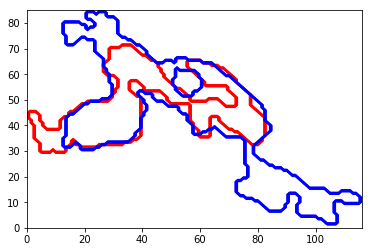

('2353_991_0', ['4221_992_0'])


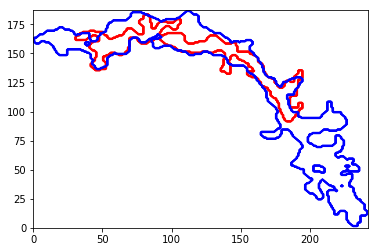

('1641_999_0', ['383_990_7'])


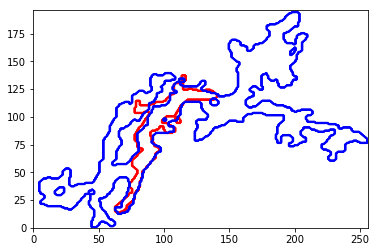

('942_996_4', ['11744_990_0'])


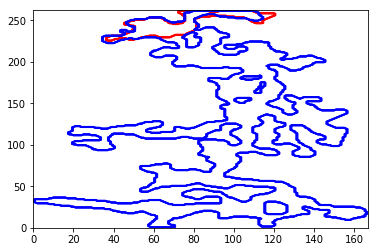

('763_998_2', ['4371_990_0'])


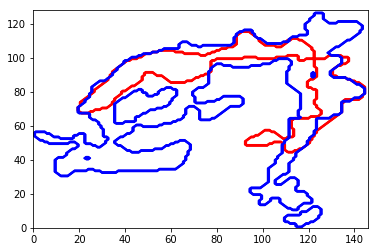

('640_990_2', ['1333_991_0'])


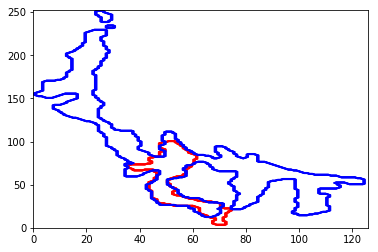

('469_994_3', ['5835_994_0'])


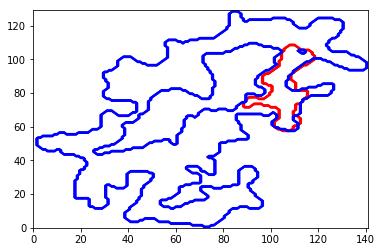

('772_998_4', ['4164_996_0'])


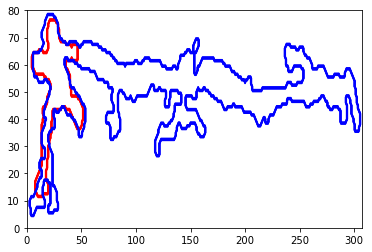

('1402_995_0', ['4265_990_0'])


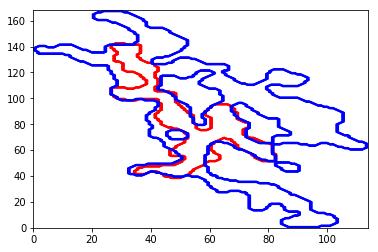

('509_999_15', ['450_991_4'])


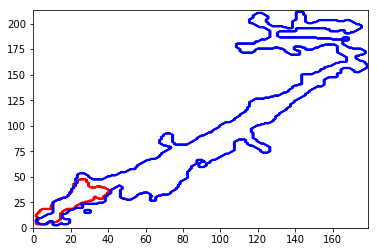

('479_994_10', ['12463_992_0'])


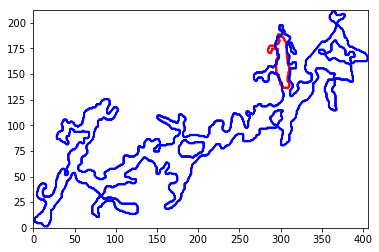

('753_991_1', ['3260_990_1'])


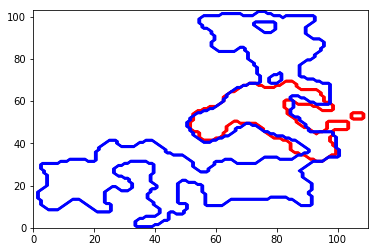

('1018_998_3', ['3499_991_0'])


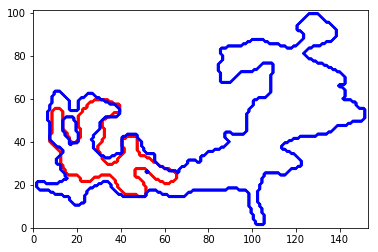

('662_994_1', ['7910_990_0'])


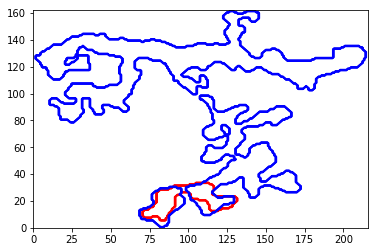

('654_995_6', ['1183_990_4'])


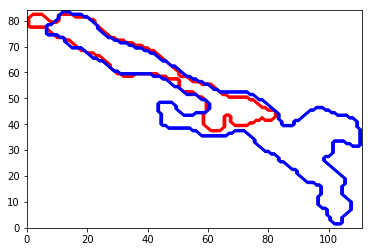

('1333_991_0', ['13295_990_0'])


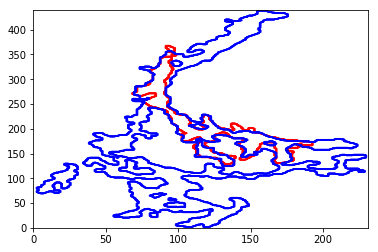

('1577_996_0', ['7338_996_0'])


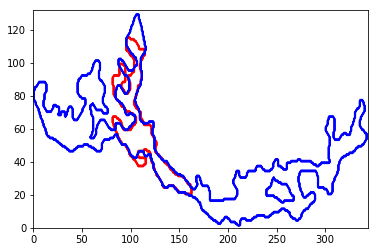

('845_991_3', ['2427_993_0'])


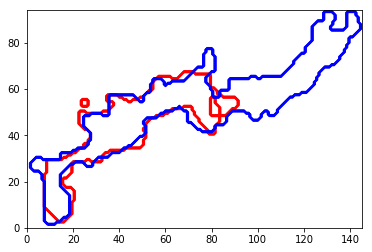

('822_993_6', ['8320_993_0'])


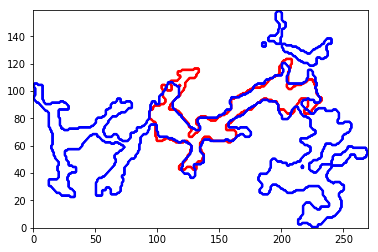

('620_990_6', ['1457_991_0'])


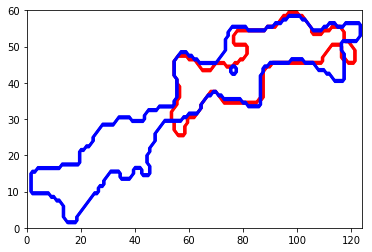

('566_992_2', ['1554_990_0'])


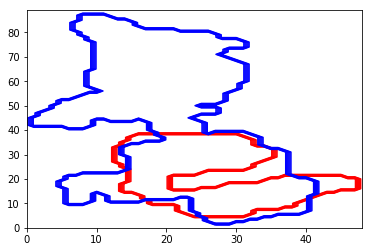

('451_990_16', ['6005_990_0'])


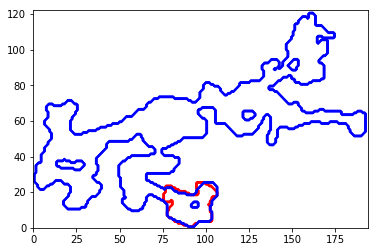

('758_995_0', ['5873_990_0'])


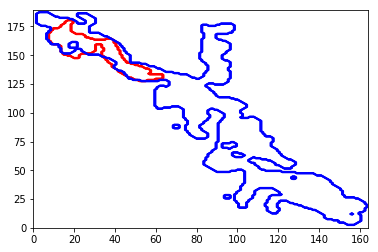

('600_999_7', ['6005_990_0'])


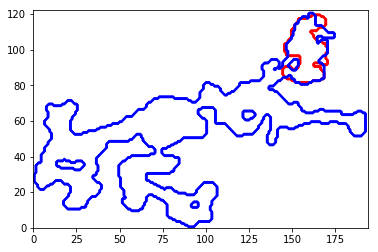

('920_997_0', ['5322_990_0'])


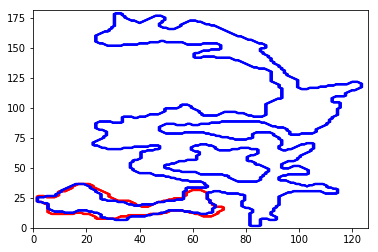

('714_994_2', ['3682_990_0'])


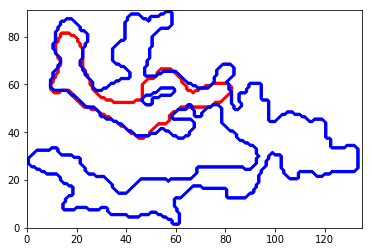

('878_993_2', ['9779_990_0'])


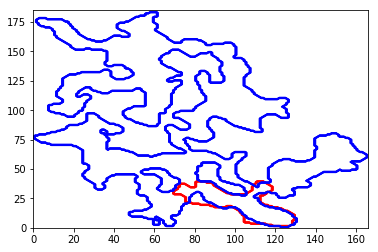

('377_996_2', ['1952_996_0'])


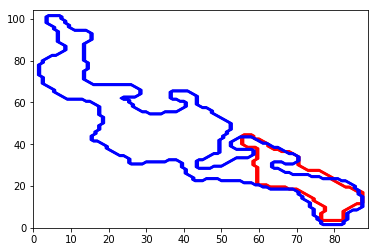

('577_997_14', ['6033_991_0'])


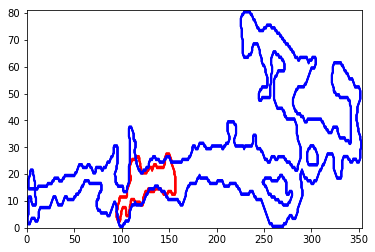

In [45]:
for k, v in p_merge.items():
    print(k, v)
    a_node = trees[k].root_node
    b_node = trees[v[0]].root_node
    new_corners = a_node.matchCorners(b_node)
    a_mask = a_node.expandMask(new_corners)
    b_mask = b_node.expandMask(new_corners)
    plt.contour(a_mask, colors='r', aspect='equal')
    plt.contour(b_mask, colors='b', aspect='equal')
    plt.show()

### matchability

In [46]:
p_merge

{'1018_998_3': ['3499_991_0'],
 '1053_999_1': ['1970_990_0'],
 '1086_990_0': ['36370_990_0'],
 '1333_991_0': ['13295_990_0'],
 '1402_995_0': ['4265_990_0'],
 '1413_992_0': ['2119_991_0'],
 '1543_996_0': ['5454_990_0'],
 '1577_996_0': ['7338_996_0'],
 '1623_996_0': ['23329_990_0'],
 '1641_999_0': ['383_990_7'],
 '1897_994_0': ['1564_995_0'],
 '2353_991_0': ['4221_992_0'],
 '2624_990_1': ['586_992_13'],
 '3066_997_0': ['4813_990_0'],
 '3753_997_0': ['4221_996_0'],
 '377_996_2': ['1952_996_0'],
 '408_995_20': ['572_993_11'],
 '416_990_17': ['450_991_4'],
 '445_992_15': ['1421_994_0'],
 '451_990_16': ['6005_990_0'],
 '461_992_13': ['19100_996_0'],
 '469_994_3': ['5835_994_0'],
 '479_994_10': ['12463_992_0'],
 '489_991_7': ['7408_990_0'],
 '490_990_0': ['4073_990_0'],
 '509_999_15': ['450_991_4'],
 '523_997_19': ['5217_992_0'],
 '566_992_2': ['1554_990_0'],
 '577_997_14': ['6033_991_0'],
 '596_992_1': ['7703_990_0'],
 '600_999_7': ['6005_990_0'],
 '620_990_6': ['1457_991_0'],
 '630_994_1': 

In [47]:
ref_tree = trees['942_996_4']
other_tree = trees['11744_990_0']

In [48]:
pvs, matchability = compute_matchability(ref_tree, other_tree)

In [49]:
pvs

array([ 990,  991,  992,  993,  994,  995,  996,  997,  998,  999, 1000])

In [50]:
matchability

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [51]:
matchability.sum()

0.0

In [9]:
for k, vs in p_merge.items():
    ref_tree = trees[k]
    for v in vs:
        other_tree = trees[v]
        pvs, matchability = compute_matchability(ref_tree, other_tree)
        if matchability.sum() > 0:
            print(k, v)

old one is longer?
old one is longer?
old one is longer?
old one is longer?
old one is longer?
old one is longer?
old one is longer?
old one is longer?
old one is longer?
old one is longer?
old one is longer?
old one is longer?


In [53]:
len(trees)

4538